✅ Dataset Loaded — Shape: (52604, 32)

🧼 Missing Values:
 Series([], dtype: int64)

📈 Price Summary:
              MCP_TL       MCP_USD       MCP_EUR
count  52604.000000  52604.000000  52604.000000
mean     202.205436     45.987986     40.697161
std       87.940090     15.446273     13.948923
min        0.000000      0.000000      0.000000
25%      139.980000     38.537500     33.597500
50%      192.880000     47.040000     41.540000
75%      290.670000     55.300000     49.220000
max     1899.990000    542.000000    518.810000


<Figure size 1800x1400 with 0 Axes>

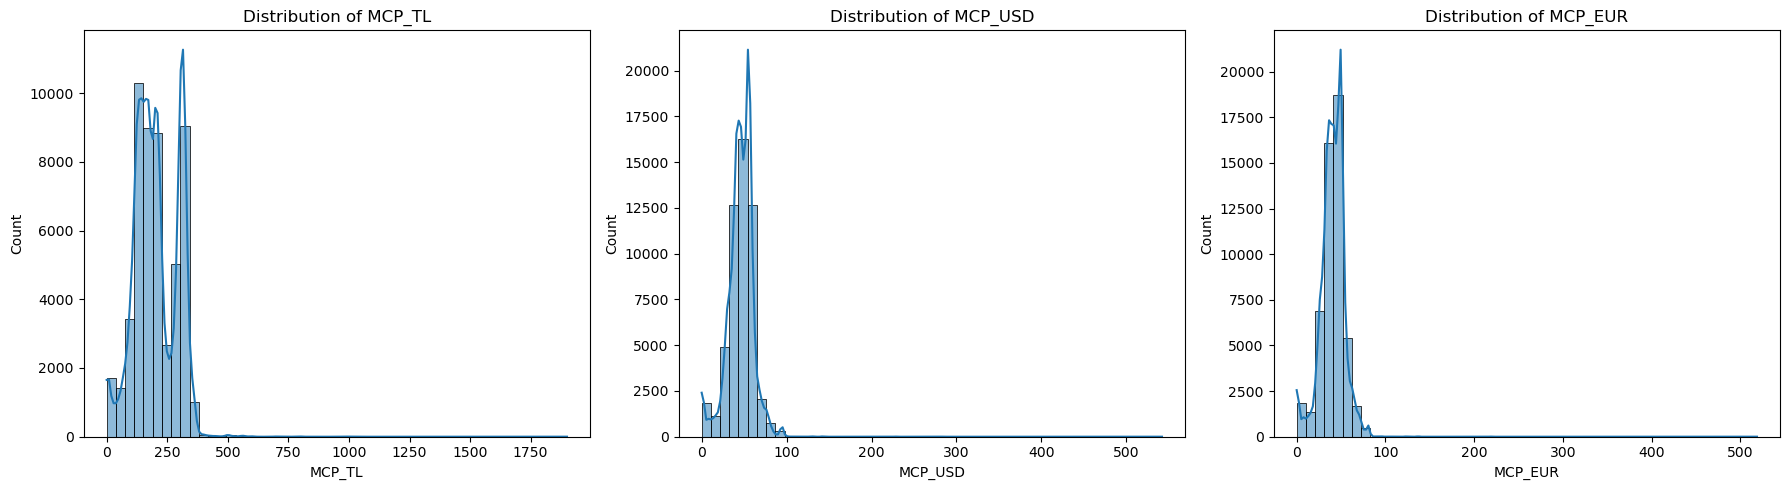

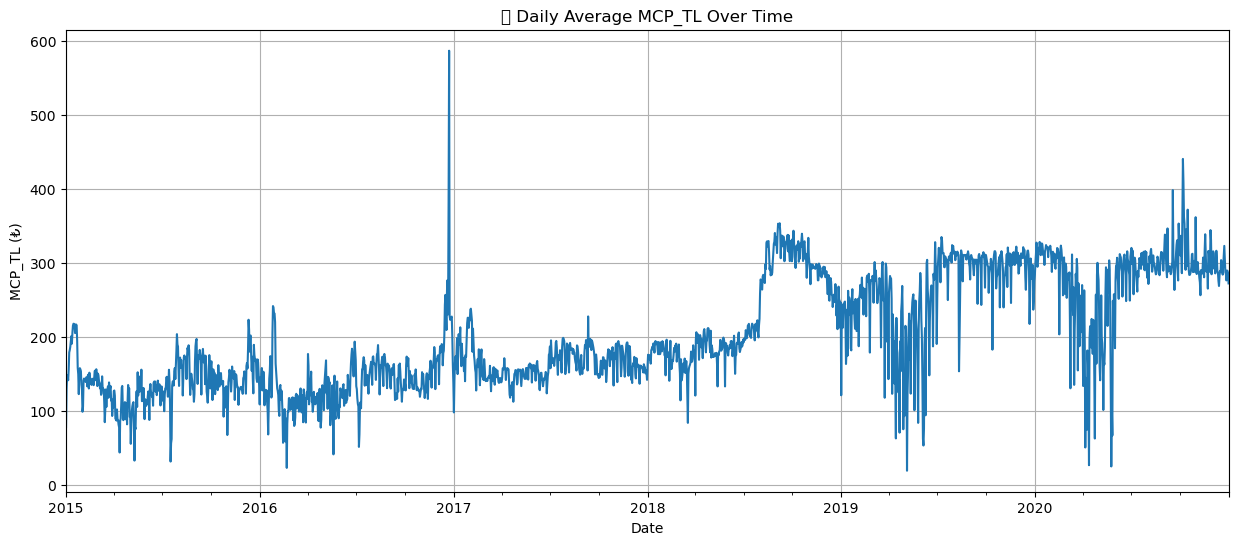

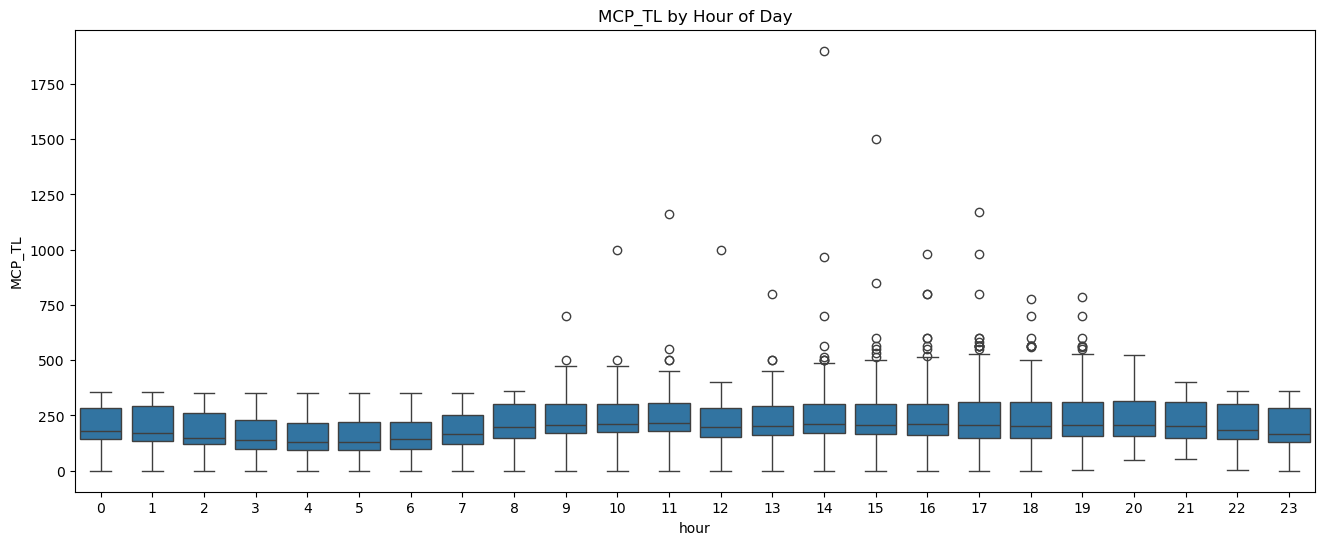

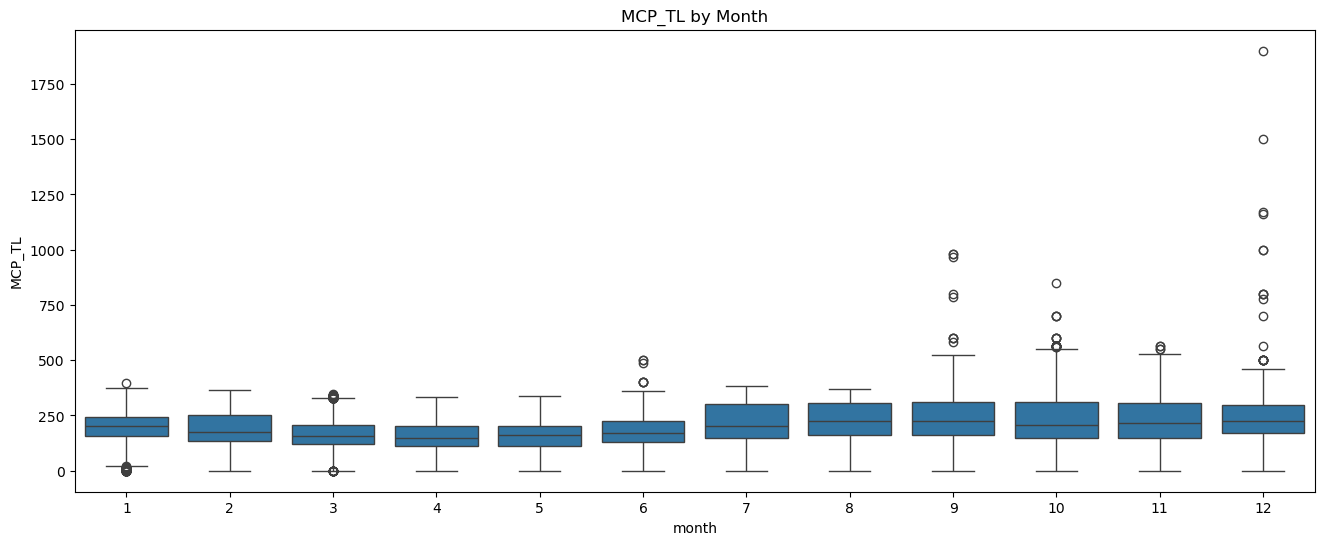

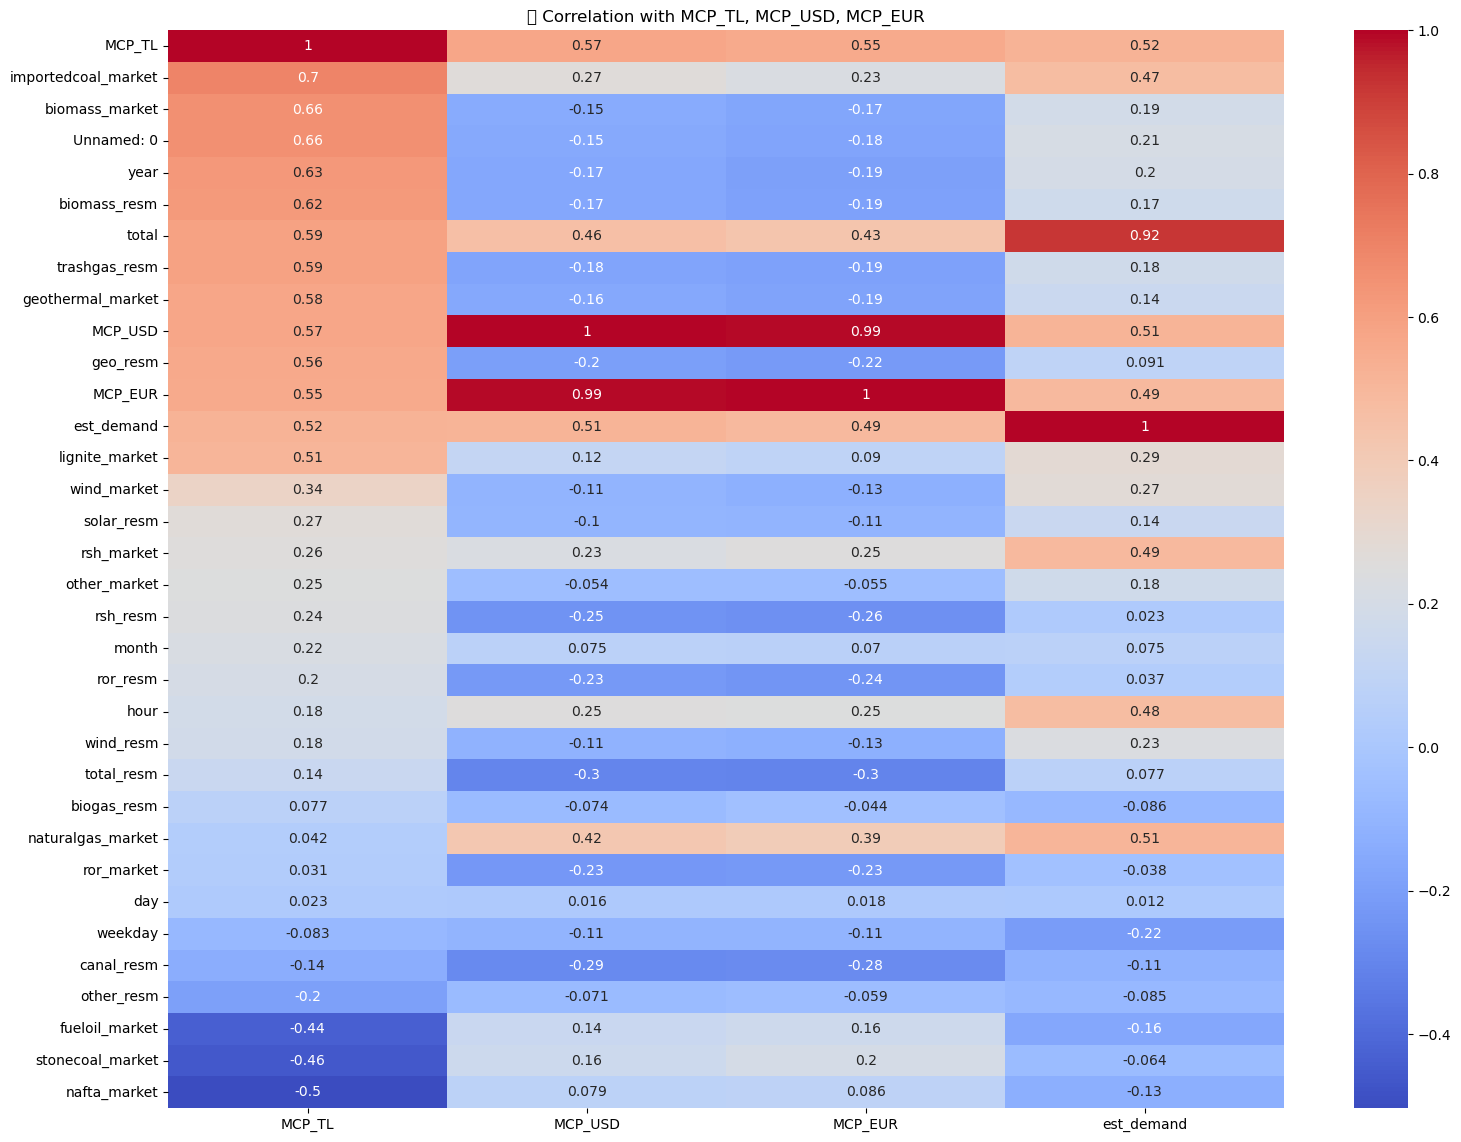


🧠 Lag Features Sample:
                      MCP_TL_lag_1h  MCP_TL_lag_2h  MCP_TL_lag_3h  \
Datetime                                                           
2015-01-01 00:00:00            NaN            NaN            NaN   
2015-01-01 01:00:00          70.23            NaN            NaN   
2015-01-01 02:00:00          20.02          70.23            NaN   
2015-01-01 03:00:00           0.00          20.02          70.23   
2015-01-01 04:00:00           0.00           0.00          20.02   
2015-01-01 05:00:00           0.00           0.00           0.00   
2015-01-01 06:00:00           0.00           0.00           0.00   
2015-01-01 07:00:00           0.00           0.00           0.00   
2015-01-01 08:00:00           0.00           0.00           0.00   
2015-01-01 09:00:00           0.00           0.00           0.00   

                     MCP_TL_lag_6h  MCP_TL_lag_12h  MCP_TL_lag_24h  
Datetime                                                            
2015-01-01 00:00:00 

In [2]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 📥 Load Dataset
df = pd.read_csv("data_final.csv")
print("✅ Dataset Loaded — Shape:", df.shape)

# 🕒 Datetime Parsing & Feature Engineering
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['weekday'] = df.index.weekday

# ❓ Missing Values
missing = df.isnull().sum()
print("\n🧼 Missing Values:\n", missing[missing > 0])

# 📊 Descriptive Stats
price_cols = ['MCP_TL', 'MCP_USD', 'MCP_EUR']
print("\n📈 Price Summary:\n", df[price_cols].describe())

# 📉 Distribution Plots
plt.figure(figsize=(18, 5))
for i, col in enumerate(price_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# 📆 Time Series Trends
df_daily = df[price_cols].resample('D').mean()
plt.figure(figsize=(15, 6))
df_daily['MCP_TL'].plot()
plt.title("📅 Daily Average MCP_TL Over Time")
plt.xlabel("Date")
plt.ylabel("MCP_TL (₺)")
plt.grid(True)
plt.show()

# 🕰️ Seasonality Plots
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='hour', y='MCP_TL')
plt.title("MCP_TL by Hour of Day")
plt.show()

plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='month', y='MCP_TL')
plt.title("MCP_TL by Month")
plt.show()

# 🔗 Correlation Matrix (Fix for non-numeric columns)
plt.figure(figsize=(18, 14))
numeric_df = df.select_dtypes(include=[np.number])  # Drop object/string columns
corr = numeric_df.corr()

# Ensure only available columns are used
valid_corr_cols = [col for col in price_cols + ['est_demand'] if col in corr.columns]
sns.heatmap(corr[valid_corr_cols].sort_values(by='MCP_TL', ascending=False), annot=True, cmap='coolwarm')
plt.title("🔍 Correlation with MCP_TL, MCP_USD, MCP_EUR")
plt.show()


# 🔁 Lag Features for Forecasting
for lag in [1, 2, 3, 6, 12, 24]:
    df[f'MCP_TL_lag_{lag}h'] = df['MCP_TL'].shift(lag)
print("\n🧠 Lag Features Sample:\n", df[[f'MCP_TL_lag_{lag}h' for lag in [1,2,3,6,12,24]]].head(10))

# 💾 Save Processed Data
df.to_csv("data_final_processed.csv")
print("\n✅ Processed dataset saved as 'data_final_processed.csv'")


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Improve aesthetics
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [4]:
df = pd.read_csv("data_final.csv")
print("✅ Dataset Loaded — Shape:", df.shape)
df.head()

✅ Dataset Loaded — Shape: (52604, 32)


,Unnamed: 0,Datetime,date,time,est_demand,total,naturalgas_market,wind_market,lignite_market,stonecoal_market,importedcoal_market,fueloil_market,geothermal_market,rsh_market,nafta_market,biomass_market,ror_market,other_market,total_resm,wind_resm,geo_resm,rsh_resm,canal_resm,ror_resm,trashgas_resm,biogas_resm,solar_resm,biomass_resm,other_resm,MCP_TL,MCP_USD,MCP_EUR
0,0,2015-01-01 00:00:00,01/01/2015,00:00,24200,19299.95,8219.36,351.39,3525.5,493.0,4453.0,725.0,75.5,760.24,4.7,0.0,569.26,123.0,2537.05,1617.87,292.93,0.0,488.52,11.76,0.82,83.14,0.0,42.02,0.0,70.23,30.29,24.9
1,1,2015-01-01 01:00:00,01/01/2015,01:00,23100,18035.66,7503.74,350.10,3292.5,493.0,4190.0,725.0,75.5,758.24,4.7,0.0,519.88,123.0,2441.30,1512.22,291.29,0.0,501.31,12.44,0.83,82.99,0.0,40.22,0.0,20.02,8.63,7.1
2,2,2015-01-01 02:00:00,01/01/2015,02:00,21800,18019.73,7495.33,339.53,3399.4,454.0,4189.0,725.0,75.5,729.24,4.7,0.0,485.03,123.0,2407.48,1526.51,292.54,0.0,460.90,12.31,0.83,75.25,0.0,39.13,0.0,0.00,0.00,0.0
3,3,2015-01-01 03:00:00,01/01/2015,03:00,21000,17946.54,7500.93,341.47,3353.4,454.0,4191.0,720.0,75.5,724.24,4.7,0.0,458.30,123.0,2345.65,1488.98,297.23,0.0,428.08,12.22,0.82,75.42,0.0,42.91,0.0,0.00,0.00,0.0
4,4,2015-01-01 04:00:00,01/01/2015,04:00,20300,17894.16,7451.26,346.34,3367.4,454.0,4191.0,720.0,75.5,707.24,4.7,0.0,453.72,123.0,2359.07,1550.93,295.30,0.0,382.80,11.90,0.83,76.44,0.0,40.86,0.0,0.00,0.00,0.0


In [5]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['weekday'] = df.index.weekday

df[['hour', 'day', 'month', 'year', 'weekday']].head()

,hour,day,month,year,weekday
Datetime,,,,,
2015-01-01 00:00:00,0,1,1,2015,3
2015-01-01 01:00:00,1,1,1,2015,3
2015-01-01 02:00:00,2,1,1,2015,3
2015-01-01 03:00:00,3,1,1,2015,3
2015-01-01 04:00:00,4,1,1,2015,3


In [6]:
missing = df.isnull().sum()
missing[missing > 0]


Series([], dtype: int64)

In [7]:
price_cols = ['MCP_TL', 'MCP_USD', 'MCP_EUR']
df[price_cols].describe()

,MCP_TL,MCP_USD,MCP_EUR
count,52604.000000,52604.000000,52604.000000
mean,202.205436,45.987986,40.697161
std,87.940090,15.446273,13.948923
min,0.000000,0.000000,0.000000
25%,139.980000,38.537500,33.597500
50%,192.880000,47.040000,41.540000
75%,290.670000,55.300000,49.220000
max,1899.990000,542.000000,518.810000


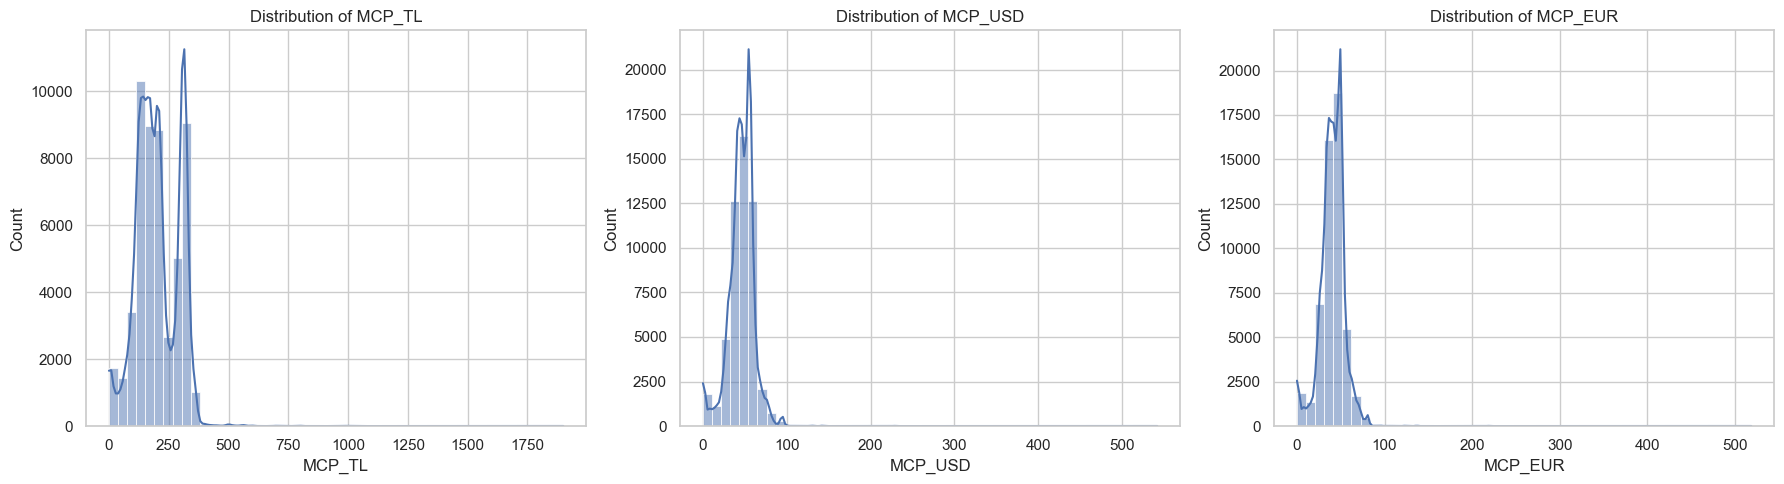

In [8]:
plt.figure(figsize=(18, 5))
for i, col in enumerate(price_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

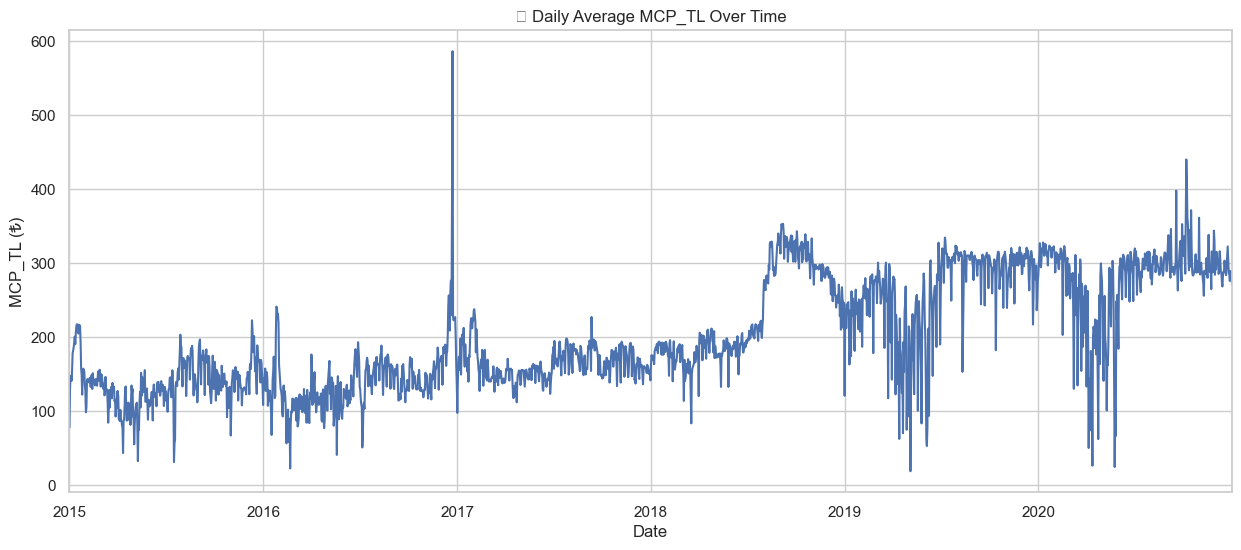

In [9]:
df_daily = df[price_cols].resample('D').mean()

plt.figure(figsize=(15, 6))
df_daily['MCP_TL'].plot()
plt.title("📅 Daily Average MCP_TL Over Time")
plt.xlabel("Date")
plt.ylabel("MCP_TL (₺)")
plt.grid(True)
plt.show()

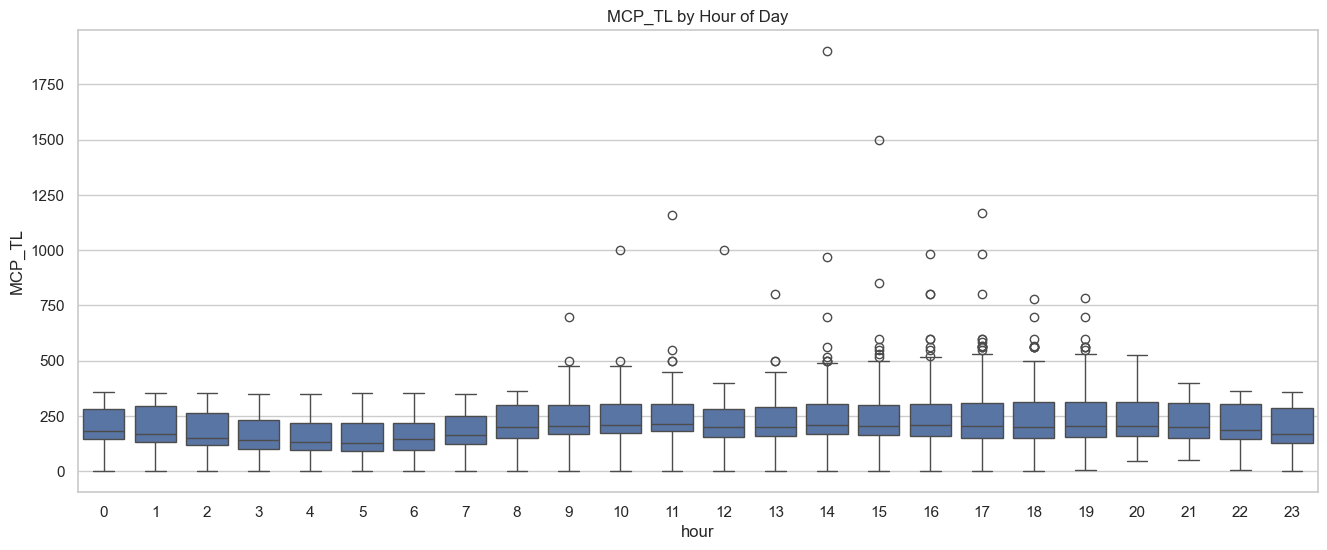

In [10]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='hour', y='MCP_TL')
plt.title("MCP_TL by Hour of Day")
plt.show()

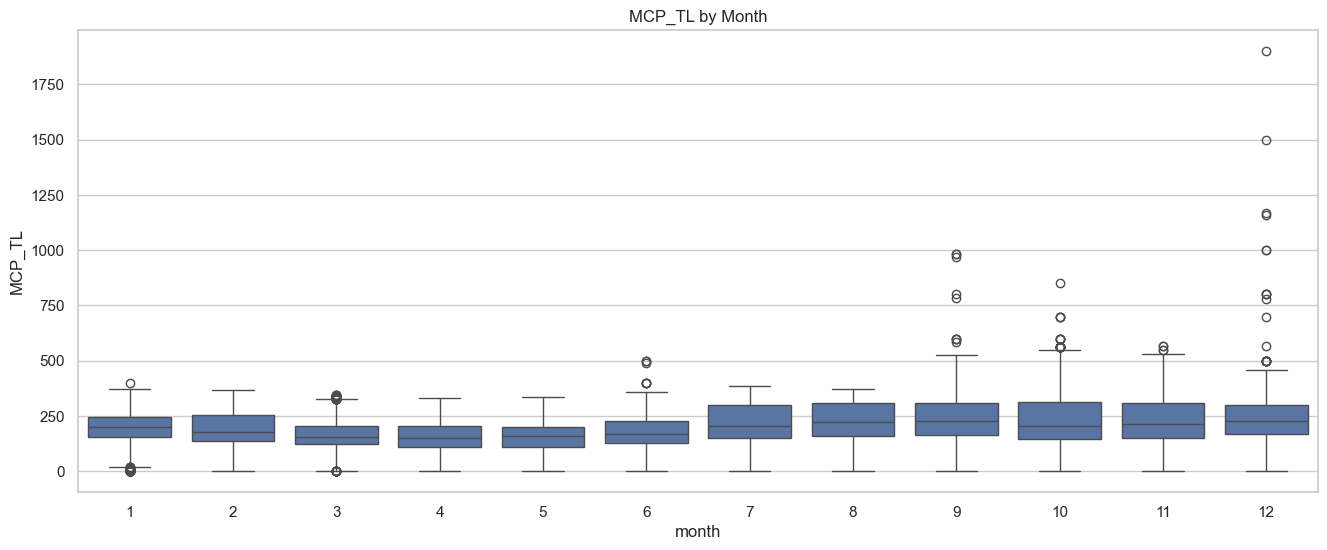

In [11]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='month', y='MCP_TL')
plt.title("MCP_TL by Month")
plt.show()

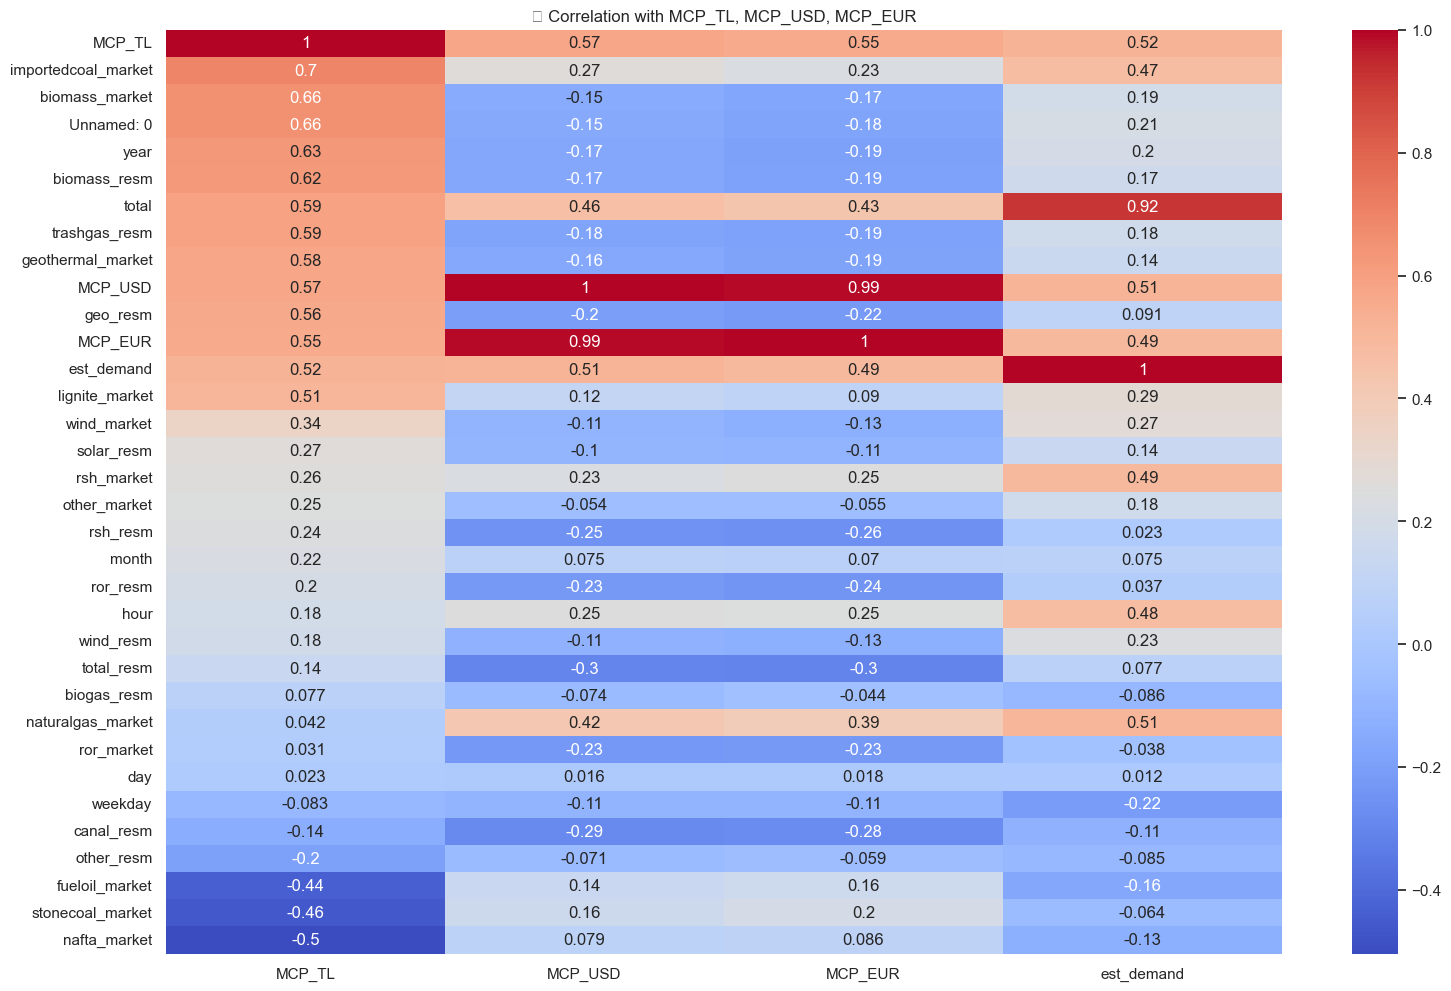

In [12]:
numeric_df = df.select_dtypes(include=[np.number])  # Keep numeric columns only
corr = numeric_df.corr()

# Select only relevant columns
valid_corr_cols = [col for col in ['MCP_TL', 'MCP_USD', 'MCP_EUR', 'est_demand'] if col in corr.columns]

plt.figure(figsize=(18, 12))
sns.heatmap(corr[valid_corr_cols].sort_values(by='MCP_TL', ascending=False), annot=True, cmap='coolwarm')
plt.title("🔍 Correlation with MCP_TL, MCP_USD, MCP_EUR")
plt.show()

In [13]:
for lag in [1, 2, 3, 6, 12, 24]:
    df[f'MCP_TL_lag_{lag}h'] = df['MCP_TL'].shift(lag)

df[[f'MCP_TL_lag_{lag}h' for lag in [1, 2, 3, 6, 12, 24]]].head(10)

,MCP_TL_lag_1h,MCP_TL_lag_2h,MCP_TL_lag_3h,MCP_TL_lag_6h,MCP_TL_lag_12h,MCP_TL_lag_24h
Datetime,,,,,,
2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,70.23,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00,20.02,70.23,NaN,NaN,NaN,NaN
2015-01-01 03:00:00,0.00,20.02,70.23,NaN,NaN,NaN
2015-01-01 04:00:00,0.00,0.00,20.02,NaN,NaN,NaN
2015-01-01 05:00:00,0.00,0.00,0.00,NaN,NaN,NaN
2015-01-01 06:00:00,0.00,0.00,0.00,70.23,NaN,NaN
2015-01-01 07:00:00,0.00,0.00,0.00,20.02,NaN,NaN
2015-01-01 08:00:00,0.00,0.00,0.00,0.00,NaN,NaN


In [15]:
df.to_csv("data_final_processed.csv")
print("✅ Processed dataset saved as 'data_final_processed.csv'")

✅ Processed dataset saved as 'data_final_processed.csv'


In [1]:
conda install -c conda-forge tensorflow

Jupyter detected...
Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: F:\Miniconda\envs\ai_env

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-2.3.0              |     pyhd8ed1ab_0         107 KB  conda-forge
    astunparse-1.6.3           |     pyhd8ed1ab_3          18 KB  conda-forge
    c-ares-1.19.1              |       h2bbff1b_0         117 KB
    ca-certificates-2025.6.15  |       h4c7d964_0         148 KB  conda-forge
    certifi-2025.6.15          |     pyhd8ed1ab_0         152 KB  conda-forge
    gast-0.6.0                 |     pyhd8ed1ab_0          24 KB  conda-forge
    giflib-5.2.2               |       h7edc060_0         105 KB
    google-pasta-0.2.0         |     pyhd8ed1ab_2          48 KB  conda-forge
    



==> WARNING: A newer version of conda exists. <==
    current version: 25.1.1
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c defaults conda





tensorflow-base-2.18 | 213.0 MB  | ####3      |  43% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  43% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  43% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  43% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  43% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  43% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  43% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  43% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  43% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  43% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  43% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  43% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  43% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  43% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  44% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  44% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  44% 
tensorflow-base-2.18 | 213.0 MB  | ####3      |  44% 
tensorflow-base-2.18 | 213.

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.1


# 📦 1. Import Required Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping
import math

ModuleNotFoundError: No module named 'tensorflow'

# 📥 2. Load and Prepare Data

In [17]:
# Load your final processed dataset
df = pd.read_csv("data_final_processed.csv", parse_dates=['Datetime'])
df.set_index('Datetime', inplace=True)

# Drop non-numeric or unnecessary columns
drop_cols = ['Unnamed: 0', 'date', 'time', 'MCP_USD', 'MCP_EUR']
df.drop(columns=drop_cols, inplace=True)

SyntaxError: invalid syntax (2490086425.py, line 1)

# 🧮 3. Normalize Features

In [ ]:
# Select target
target = 'MCP_TL'

# All features
features = df.drop(columns=[target]).columns.tolist()

# Initialize scalers
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale data
X_scaled = scaler_X.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[[target]])

# 🧱 4. Create Time Series Dataset

In [ ]:
# Function to create time windowed sequences
def create_sequences(X, y, time_steps=24):
    Xs, ys = [], []
    for i in range(time_steps, len(X)):
        Xs.append(X[i-time_steps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

# Create sequences (24 hours = 1 day window)
TIME_STEPS = 24
X_seq, y_seq = create_sequences(X_scaled, y_scaled, TIME_STEPS)

print("✅ Sequence shapes:", X_seq.shape, y_seq.shape)

# 🧪 5. Train-Test Split

In [ ]:
# Use 80% for training, 20% for testing
split_index = int(0.8 * len(X_seq))

X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]

# 🧠 6. Build and Train LSTM Model

In [ ]:
# Define LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# 📉 7. Evaluate the Model

In [ ]:
# Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test)

# Evaluation metrics
mae = mean_absolute_error(y_test_inv, y_pred)
rmse = math.sqrt(mean_squared_error(y_test_inv, y_pred))

print(f"📊 MAE: {mae:.2f}")
print(f"📊 RMSE: {rmse:.2f}")

#  📊 8. Plot Actual vs Predicted

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_test_inv, label='Actual MCP_TL')
plt.plot(y_pred, label='Predicted MCP_TL')
plt.title("🔍 LSTM - Actual vs Predicted MCP_TL")
plt.xlabel("Time Step (hour)")
plt.ylabel("Price (₺)")
plt.legend()
plt.grid()
plt.show()

# 💾 9. Save the Model 

In [ ]:
# model.save("lstm_mcp_forecast_model.h5")
# print("✅ Model saved as lstm_mcp_forecast_model.h5")